# Approach

The goal here is to build an unsupervised learning model to detect fraud actions with inputs of Numbers and The Time and Amount of the transaction.

Methods: we are trying to detect the outliers of the dataset, the frauds,and to look into the data distributions and find what possibly would have lead to fraud transactions and what is the common link. we have multiple features, so it it might be a good idea to do feature selectionby choosing the most important features to enter our model.

# Dataset

the dataset contains V1 - V28 features: These are numerical input variables from a PCA (Principal Component Analysis) transformation
Time: This column represents the time in seconds elapsed from current transaction to first transaction
Amount: The monetary value of the transaction
Class: This is the target variable, where ‘1’ indicates a fraudulent transaction and ‘0’ indicates a normal (non-fraudulent) transaction.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/creditcardfraud


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv(path + "/creditcard.csv")

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.shape

(284807, 31)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [8]:
data['Class'].unique()

array([0, 1])

In [9]:
print(data.Class.value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


# Feature Engineering

Transforming the time feature and Amount  

In [10]:
import pandas as pd
data['Time_Hours'] = data['Time'] / 3600  # Convert seconds to hours

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['Amount_scaled'] = scaler.fit_transform(data[['Amount']])
data = data.drop(columns=['Amount', 'Time'])

<ipython-input-12-d00555da0893>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Class'] == 0]["Time_Hours"], color='g')
<ipython-input-12-d00555da0893>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Class'] == 1]["Time_Hours"], color='r')


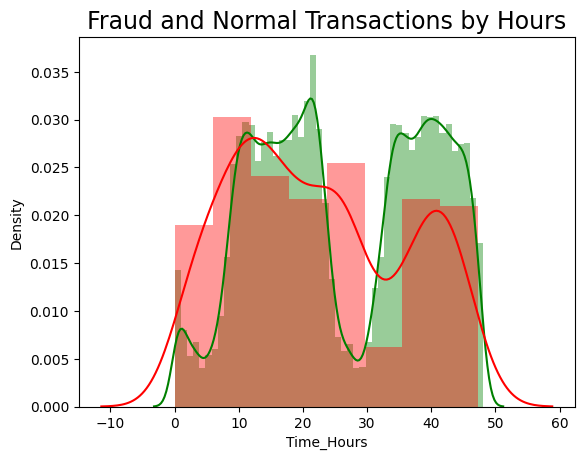

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.distplot(data[data['Class'] == 0]["Time_Hours"], color='g')
sns.distplot(data[data['Class'] == 1]["Time_Hours"], color='r')
plt.title('Fraud and Normal Transactions by Hours', fontsize=17)
# plt.xlim([-1,25])
plt.show()

Data Distribution

<ipython-input-13-c3fc2110dc50>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data.Class == 1][col], bins=50, color='g')
<ipython-input-13-c3fc2110dc50>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data.Class == 0][col], bins=50, color='r')
<ipython-input-13-c3fc2110dc50>:13: 

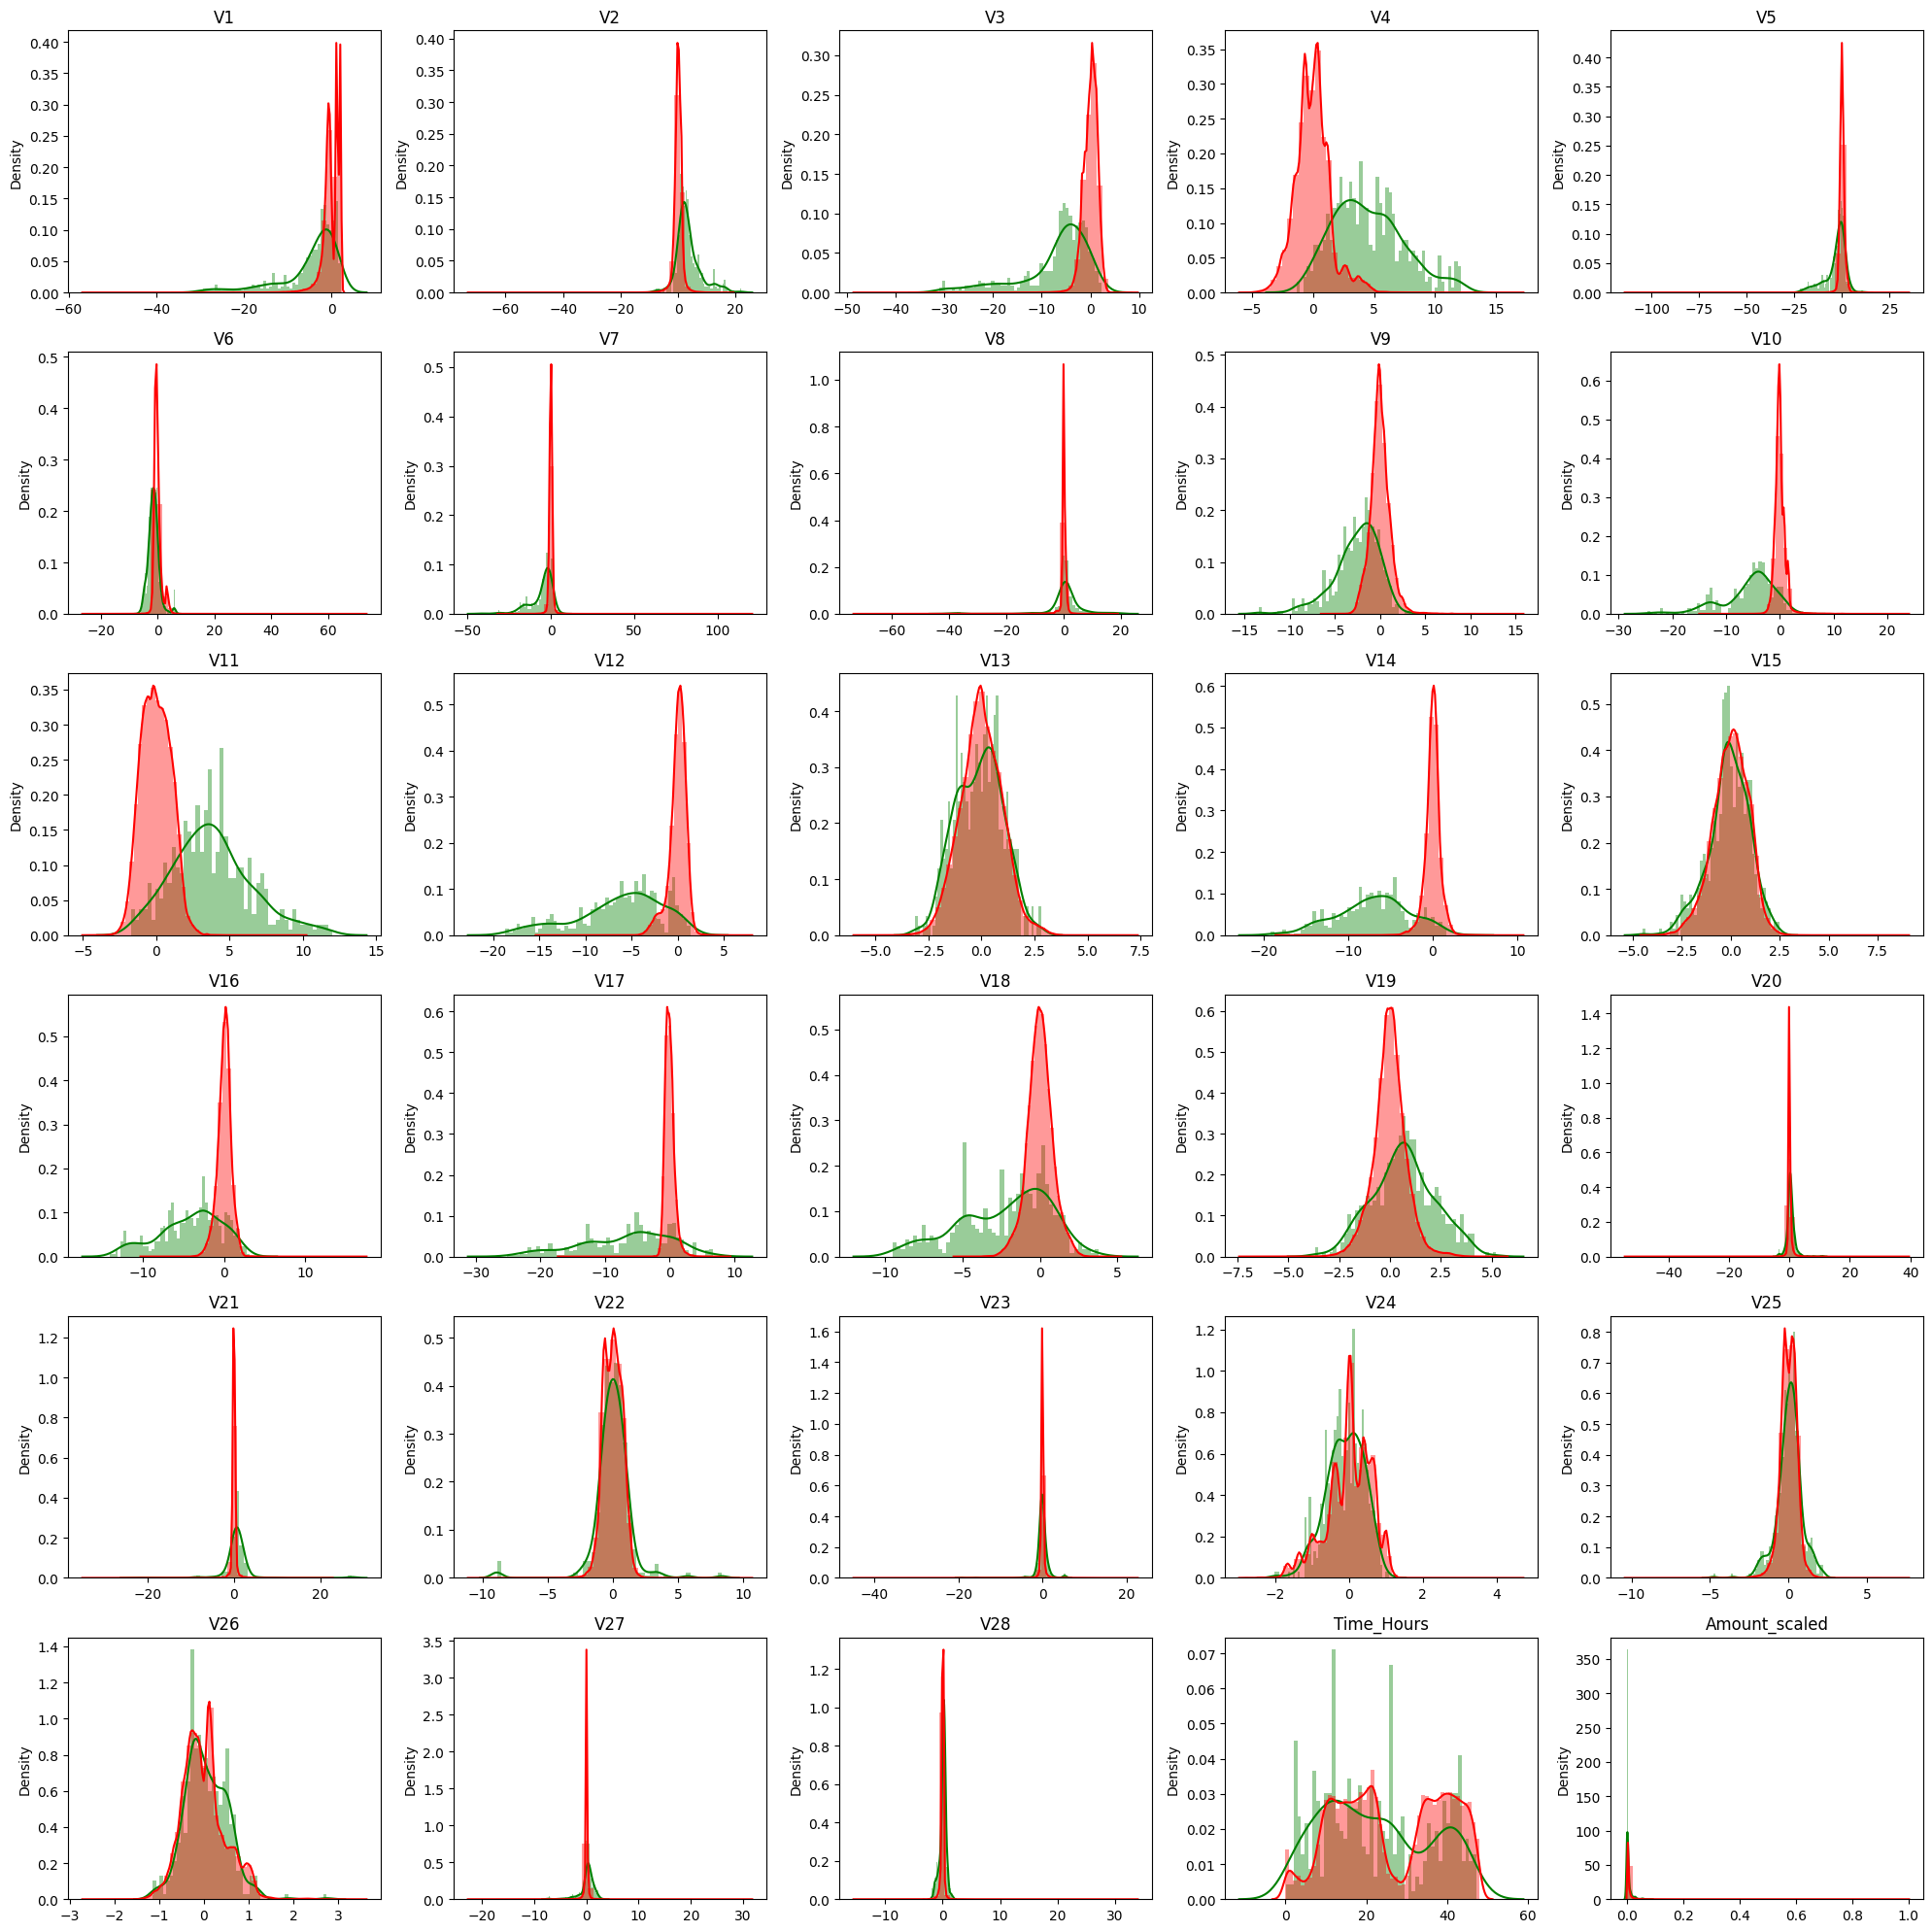

In [13]:
import matplotlib.gridspec as gridspec
import  numpy as np
columns = data.drop('Class', axis=1).columns
num_cols = 5
num_rows = int(np.ceil(len(columns) / num_cols))

grid = gridspec.GridSpec(num_rows, num_cols)

plt.figure(figsize=(20, 10 * num_rows / 3))

for n, col in enumerate(data[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(data[data.Class == 1][col], bins=50, color='g')
    sns.distplot(data[data.Class == 0][col], bins=50, color='r')
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')

plt.tight_layout()
plt.show()

# Feature Selection

In [14]:
from scipy.stats import ttest_ind
fraud = data[data['Class'] == 1]
normal = data[data['Class'] == 0]
p_values = []
for col in data.columns[:-1]:  # Exclude 'Class' column
    stat, p = ttest_ind(fraud[col], normal[col], equal_var=False)
    p_values.append((col, p))
p_values = pd.DataFrame(p_values, columns=['Component', 'p-value']).sort_values('p-value')
print(p_values.head(10))

   Component        p-value
28     Class   0.000000e+00
13       V14  1.040151e-140
3         V4  4.587317e-136
10       V11  4.577212e-120
11       V12  1.481317e-112
9        V10   3.382884e-93
15       V16   7.905326e-84
8         V9   1.193505e-79
2         V3   4.786081e-75
16       V17   1.558094e-71


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [15]:
from sklearn.ensemble import RandomForestClassifier
x=data.drop('Class',axis=1)
y=data['Class']
rnd_clf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
rnd_clf.fit(x, y)

RandomForestClassifier(criterion='entropy', random_state=0)

In [16]:
# Step 6: Extract feature importance
importances = rnd_clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Print top 10 most important components
print("Top 10 most important principal components:")
print(feature_importance_df.head(10))

Top 10 most important principal components:
   Feature  Importance
16     V17    0.218242
13     V14    0.147598
9      V10    0.102674
11     V12    0.084565
10     V11    0.079427
15     V16    0.045512
3       V4    0.041675
6       V7    0.034015
2       V3    0.031375
8       V9    0.019004


In [17]:
selected_features = ['V17', 'V14', 'V10', 'V16', 'V12', 'V11', 'V4', 'V3', 'V7', 'V18','Time_Hours']
X2 = data[selected_features]

In [18]:
X2.head()

,V17,V14,V10,V16,V12,V11,V4,V3,V7,V18,Time_Hours
0,0.207971,-0.311169,0.090794,-0.470401,-0.617801,-0.551600,1.378155,2.536347,0.239599,0.025791,0.000000
1,-0.114805,-0.143772,-0.166974,0.463917,1.065235,1.612727,0.448154,0.166480,-0.078803,-0.183361,0.000000
2,1.109969,-0.165946,0.207643,-2.890083,0.066084,0.624501,0.379780,1.773209,0.791461,-0.121359,0.000278
3,-0.684093,-0.287924,-0.054952,-1.059647,0.178228,-0.226487,-0.863291,1.792993,0.237609,1.965775,0.000278
4,-0.237033,-1.119670,0.753074,-0.451449,0.538196,-0.822843,0.403034,1.548718,0.592941,-0.038195,0.000556


In [19]:
fraud = data[data['Class'] == 1]
normal = data[data['Class'] == 0]

mean_diff = (fraud.mean() - normal.mean()).abs().sort_values(ascending=False)
print(mean_diff.head(10))

V3            7.045452
V14           6.983787
V17           6.677371
V12           6.270225
V10           5.686707
V7            5.578368
V1            4.780206
V4            4.549889
V16           4.147110
Time_Hours    3.914276
dtype: float64


In [20]:
features = ['V3', 'V14', 'V17', 'V12', 'V10', 'V7', 'V1', 'V4', 'V16', 'Time_Hours']
X = data[features]

In [21]:
X.head()

,V3,V14,V17,V12,V10,V7,V1,V4,V16,Time_Hours
0,2.536347,-0.311169,0.207971,-0.617801,0.090794,0.239599,-1.359807,1.378155,-0.470401,0.000000
1,0.166480,-0.143772,-0.114805,1.065235,-0.166974,-0.078803,1.191857,0.448154,0.463917,0.000000
2,1.773209,-0.165946,1.109969,0.066084,0.207643,0.791461,-1.358354,0.379780,-2.890083,0.000278
3,1.792993,-0.287924,-0.684093,0.178228,-0.054952,0.237609,-0.966272,-0.863291,-1.059647,0.000278
4,1.548718,-1.119670,-0.237033,0.538196,0.753074,0.592941,-1.158233,0.403034,-0.451449,0.000556


# Z_Score Method

This method measures how many standard deviations a data point is away from the mean. Points that fall far from the mean are considered anomaliesusing Percentiles: Identifying anomalies based on percentiles or quantiles, where values below or above a certain threshold are considered outliers.

In [22]:
from scipy.stats import zscore

z_scores = np.abs(zscore(X))
threshold = 3
anomalies = (z_scores > threshold).any(axis=1)

# Predicted labels: 1 for anomaly (potential fraud), 0 for normal
y_pred = np.where(anomalies, 1,0)

In [23]:
y_true = data['Class'].values

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

[[268296  16019]
 [    56    436]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    284315
           1       0.03      0.89      0.05       492

    accuracy                           0.94    284807
   macro avg       0.51      0.91      0.51    284807
weighted avg       1.00      0.94      0.97    284807



# Mahalanobis Distance

Mahalanobis Distance calculates how far a point is from the center of the distribution, taking into account the correlation between features. It differs from Euclidean distance in that it scales based on the feature covariances.

In [25]:
from scipy.spatial.distance import mahalanobis
from numpy.linalg import inv, LinAlgError

In [26]:
mean_vec = np.mean(X2, axis=0)
cov_matrix = np.cov(X2, rowvar=False)

try:
    inv_cov_matrix = inv(cov_matrix)
except LinAlgError:

    inv_cov_matrix = inv(cov_matrix + np.eye(cov_matrix.shape[0]) * 1e-3)

mahal_distances = [mahalanobis(row, mean_vec, inv_cov_matrix) for row in X2.values]
X["mahal_dist"] = mahal_distances


<ipython-input-26-52ba5fd91e90>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["mahal_dist"] = mahal_distances


In [27]:
threshold = np.percentile(mahal_distances, 97)  # Top 3% as anomalies
X["is_outlier"] = X["mahal_dist"] > threshold

<ipython-input-27-e786c5b100e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["is_outlier"] = X["mahal_dist"] > threshold


In [28]:
X["is_outlier"]=[1 if val else 0 for val in X["is_outlier"]]

<ipython-input-28-922a1d739df7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["is_outlier"]=[1 if val else 0 for val in X["is_outlier"]]


In [29]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

y_true = data['Class'].values
y_pred = X["is_outlier"].astype(int).values

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))
print("ROC AUC Score:", roc_auc_score(y_true, y_pred))


[[276202   8113]
 [    60    432]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    284315
           1       0.05      0.88      0.10       492

    accuracy                           0.97    284807
   macro avg       0.53      0.92      0.54    284807
weighted avg       1.00      0.97      0.98    284807

ROC AUC Score: 0.9247567645470521


# DBSCAN

Density-Based Spatial Clustering of Applications with Noise): Clusters data points based on their density, with points that do not belong to any cluster considered outliers.

In [30]:
from sklearn.cluster import DBSCAN

In [31]:
dbscan = DBSCAN(eps=1, min_samples=41)  # Increase eps
labels = dbscan.fit_predict(X)

In [32]:
labels

array([-1,  0, -1, ..., -1, -1, 45])

In [33]:
predicted = [1 if label == -1 else 0 for label in labels]

# y_true = your actual Class column (0 = normal, 1 = fraud)
print(confusion_matrix(y_true, predicted))
print(classification_report(y_true, predicted))

[[137586 146729]
 [     8    484]]
              precision    recall  f1-score   support

           0       1.00      0.48      0.65    284315
           1       0.00      0.98      0.01       492

    accuracy                           0.48    284807
   macro avg       0.50      0.73      0.33    284807
weighted avg       1.00      0.48      0.65    284807



# K Means

Data points that do not belong to well-defined clusters may be considered anomalies.

In [34]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
data['kmeans_cluster'] = kmeans.fit_predict(X)

In [35]:
centers = kmeans.cluster_centers_
# Calculate distance from each point to its cluster center
distances = np.linalg.norm(X - centers[kmeans_labels], axis=1)
# Add distances to your dataframe
data['distance_to_center'] = distances

In [36]:
#flaging the N farthest Points as outliers
N = 500
threshold = np.sort(distances)[-N]
data['kmeans_outlier'] = (data['distance_to_center'] >= threshold).astype(int)

In [37]:
data['kmeans_outlier'].value_counts()

,count
kmeans_outlier,
0,284307
1,500


In [38]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(data['Class'], data['kmeans_outlier']))
print(classification_report(data['Class'], data['kmeans_outlier']))

[[284021    294]
 [   286    206]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.41      0.42      0.42       492

    accuracy                           1.00    284807
   macro avg       0.71      0.71      0.71    284807
weighted avg       1.00      1.00      1.00    284807



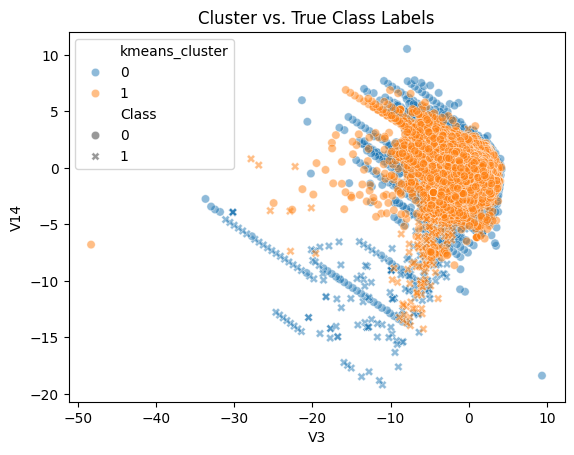

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting to visually inspect the relationship
sns.scatterplot(x=data['V3'], y=data['V14'], hue='kmeans_cluster', style='Class', data=data, alpha=0.5)
plt.xlabel("V3")
plt.ylabel("V14")
plt.title("Cluster vs. True Class Labels")
plt.show()


# Isolation Forest

An ensemble learning method that builds a tree structure to isolate anomalies efficiently.

In [40]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.0017)  # Approximate fraud ratio
iso.fit(X)
y_pred = iso.predict(X)
data['iso_score'] = iso.decision_function(X)

print("Score range:", data['iso_score'].min(), "to", data['iso_score'].max())
print("Example scores:", data['iso_score'][:10])
# Map prediction: 1 -> normal, -1 -> anomaly
data['anomaly'] = (y_pred == -1).astype(int)

Score range: -0.059784452563024115 to 0.3713168411302195
Example scores: 0    0.286379
1    0.320182
2    0.237838
3    0.285763
4    0.297388
5    0.332523
6    0.316335
7    0.255934
8    0.317170
9    0.311301
Name: iso_score, dtype: float64


In [41]:
from sklearn.metrics import classification_report, precision_recall_curve, average_precision_score

print(classification_report(data['Class'], data['anomaly']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.45      0.45      0.45       492

    accuracy                           1.00    284807
   macro avg       0.73      0.72      0.72    284807
weighted avg       1.00      1.00      1.00    284807



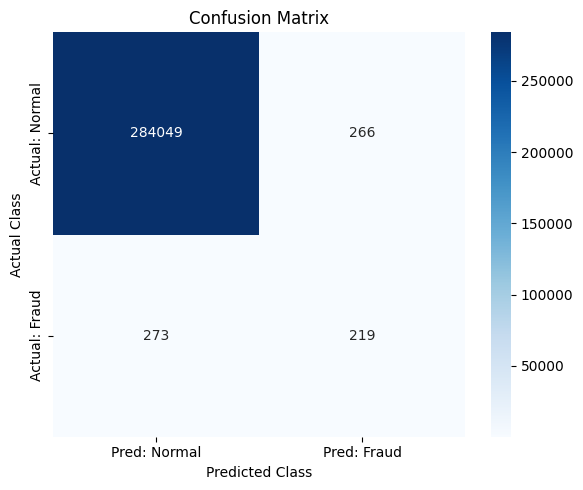

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Map predictions to 0 (normal) and 1 (fraud)
mapped_preds = np.where(y_pred == -1, 1, 0)

# Create the confusion matrix
cm = confusion_matrix(data['Class'], mapped_preds)

# Plot it
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: Normal', 'Pred: Fraud'], yticklabels=['Actual: Normal', 'Actual: Fraud'])
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.tight_layout()
plt.show()


In [43]:
import joblib
joblib.dump(iso, "isolation_forest.joblib")

['isolation_forest.joblib']

In [44]:
train_scores = iso.decision_function(X)
np.save("train_scores.npy", train_scores)